# Run one robot for one day

Run an experiment with a single robot exploring an environment. The environment and the robot policy is specified in experiment runs. 

In [ ]:
import sys
sys.path.append("..")
from settings import Config
import pathlib
from pprint import pprint
import gzip as compress
import copy
import pickle
from WaterberryFarm import WaterberryFarm, MiniberryFarm, WaterberryFarmEnvironment

from WbfExperiment import simulate_1day
from wbf_helper import get_geometry, create_wbfe
from WaterberryFarm import WaterberryFarm, MiniberryFarm, WBF_IM_DiskEstimator, WBF_IM_GaussianProcess, WBF_Score_WeightedAsymmetric, get_datadir

from Policy import FollowPathPolicy, RandomWaypointPolicy
from Robot import Robot
from WbfFigures import graph_env_im, graph_scores, hook_create_pictures, end_of_day_graphs


In [2]:

# the experiment for the robot run
experiment = "1robot1day"
run = "random-waypoint-miniberry-30"
exp = Config().get_experiment(experiment, run)
pprint(exp)

# the experiment for the 
expenv = Config().get_experiment("environment", exp["experiment-run"])
pprint(expenv)

Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
The system independent config file of the experiment {experiment_run_indep} was empty, this is a likely error, but continuing.
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\1robot1day\random-waypoint-miniberry-30_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: 1robot1day/random-waypoint-miniberry-30 successfully loaded
{'data_dir': WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/WBF/ExperimentData/1robot1day/random-waypoint-miniberry-30'),
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/WBF/WaterberryFarms/experiment_configs/1robot1day/random-waypoint-miniberry-30.yaml'),
 'experiment-run': 'miniberry-30',
 'group_name': 

In [3]:
# create the policy

geo = get_geometry(expenv["typename"])
# a random waypoint policy
# geo = copy.copy(geom)
policy = RandomWaypointPolicy(vel = 1, low_point = [geo["xmin"], geo["ymin"]], high_point = [geo["xmax"], geo["ymax"]], seed = 0)  
policy.name = exp["policyname"]


In [ ]:
# FIXME: remove this code

def action_run_1day(choices, exp):
    """
    Implements a single-day experiment with a single robot in the WBF simulator. This is the top level function which is called to run the experiment. 

    choices: a dictionary into which the parameters of the experiments are being loaded. A copy of this will be internally created. 

    results: the return value, which contains both all the input values in the choices, as well as the output data (or references to it.)

    """
    results = copy.deepcopy(choices)
    results["action"] = "run-one-day"
    if "im_resolution" not in results:
        results["im_resolution"] = 1    
    results["typename"] = exp["typename"]
    wbf, wbfe = create_wbfe(exp)
    # move ahead to the starting point of the environment
    wbfe.proceed(results["time-start-environment"])
    results["wbf"] = wbf
    results["wbfe"] = wbfe
    results["savedir"] = exp["data_dir"]
    results["exp-name"] = results["typename"] + "_" # name of the exp., also dir to save data
    results["days"] = 1
    results["exp-name"] = results["exp-name"] + "1M_"
    get_geometry(results["typename"], results)
    # override the velocity and the timesteps per day, if specified
    if "timesteps-per-day-override" in results:
        results["timesteps-per-day"] = results["timesteps-per-day-override"]
    if "velocity-override" in results:
        results["velocity"] = results["velocity-override"]
    results["robot"] = Robot("Rob", 0, 0, 0, env=None, im=None)
    # Setting the policy
    results["exp-name"] = results["exp-name"] + results["policy-code"].name
    results["robot"].assign_policy(results["policy-code"])

    if "results-filename" in results:
        results_filename = results["results-filename"]
    else:
        results_filename = f"res_{results['exp-name']}"
    if "results-basedir" in results:
        results_path = pathlib.Path(results["results-basedir"], results_filename)
    else:
        results_path = pathlib.Path(results["savedir"], results_filename)    
    results["results-path"] = results_path
    # if dryrun is specified, we return the results without running anything
    if "dryrun" in results and results["dryrun"] == True:
        return results
    # results["oneshot"] = False # calculate one observation score for all obs.
    # running the simulation
    simulate_1day(results)
    #
    print(f"Saving results to: {results_path}")
    with compress.open(results_path, "wb") as f:
        pickle.dump(results, f)
    return results

INFO:root:loading the geometry and environment from saved data
INFO:root:loading done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from gz C:\Users\lboloni\Documents\Code\_TempData\WBF\Miniberry-30\precalc_tylcv\env_value_00006.gz
INFO:root:Loading from gz C:\Users\lboloni\Documents\Code\_TempData\WBF\Miniberry-30\precalc_tylcv\env_value_00006.gz done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from gz C:\Users\lboloni\Documents\Code\_TempData\WBF\Miniberry-30\precalc_ccr\env_value_00006.gz
INFO:root:Loading from gz C:\Users\lboloni\Documents\Code\_TempData\WBF\Miniberry-30\precalc_ccr\env_value_00006.gz done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from gz C:\Users\lboloni\Documents\C

C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\1robot1day\random-waypoint-miniberry-30\res_Miniberry-30_1M_RandomWaypoint-Seed0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 42 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'H', 'L', 'R', 'S', 'T', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 36, 38, 39, 40, 43, 47, 53, 54, 55, 57, 58, 60, 68, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH'

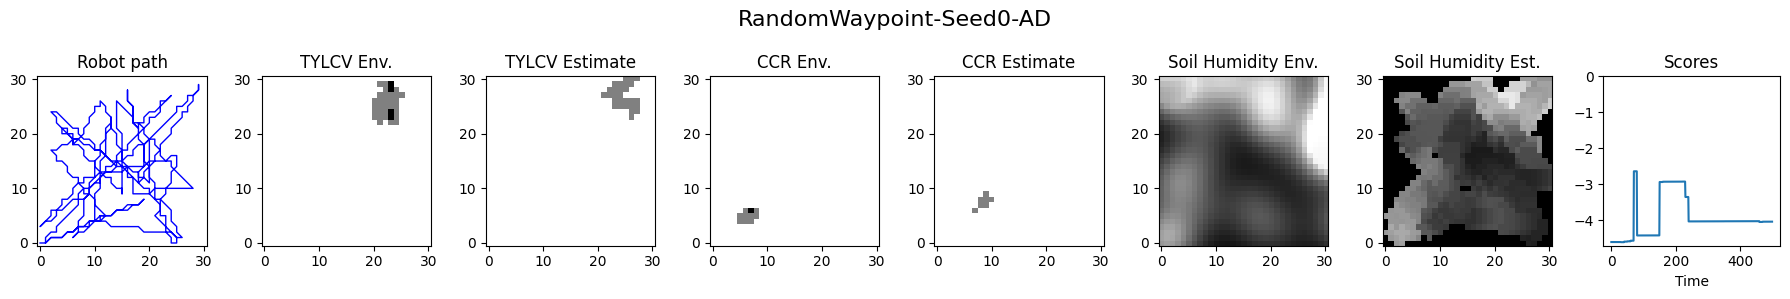

In [6]:

# if force_run is false, we do not re-run an already run policy 
force_run = False
picture_paths = []

default_choices = {"geometry": "Miniberry-30", "action": "run", "scenario": "one-day-single-value", "visualize": 0}
default_choices["velocity"] = 1
default_choices["timesteps-per-day-override"] = 500 # 1000
default_choices["time-start-environment"] = 6
# uncomment or change this to a lower number to run the estimator more often
default_choices["im_resolution"] = 10
default_choices["results-basedir"] = exp["data_dir"]
# was benchmark_dir


# do a dryrun, to get the path to the cached values
choices = copy.copy(default_choices)
choices["policy-code"] = policy
choices["dryrun"] = True
choices["estimator-name"] = "AD"
choices["estimator-code"] = WBF_IM_DiskEstimator(geo["width"], geo["height"])
choices["score-code"] = WBF_Score_WeightedAsymmetric()

results = action_run_1day(choices)
path = results["results-path"]
print(path)
# print(results.keys())
# avoid re-running experiments
if not path.exists() or force_run:
    choices["dryrun"] = False
    results = action_run_1day(choices)
else:
    with compress.open(path, "rb") as f:
        results = pickle.load(f)
if "picture-path" in results:
    print("Picture path in results!")
    picture_paths.append(results["picture-path"])
end_of_day_graphs(results, f"daily-summary-{results['policy-code'].name}-{results['estimator-name']}.pdf", plot_uncertainty = False)